In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# https://www.kaggle.com/code/ybifoundation/telecom-customer-churn-prediction?scriptVersionId=164677641&cellId=3
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.describe()


,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [20]:
df.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Replacing the blanks with "0" as tenure is 0 and no toatal charges are recorded

In [25]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", '0')
df['TotalCharges']=df['TotalCharges'].astype('float')
                                             

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
df.duplicated().sum()

np.int64(0)

#Converted the 1/0 values of Senior Citizen to yes/no.

In [29]:
def conv(value):
    if value == 0:
        return'no'
    else:
        return 'yes'
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [30]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


#Count of people who Churned

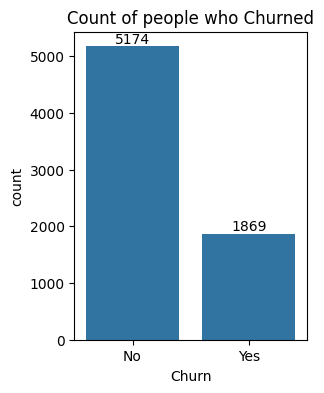

In [37]:
plt.figure(figsize=(3,4))
ax=sns.countplot(data = df, x= 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of people who Churned')
plt.show()

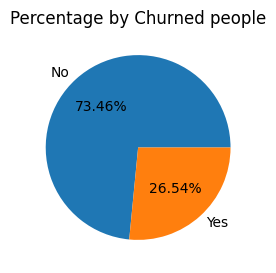

In [45]:
plt.figure(figsize=[3,3])
gb = df.groupby('Churn').agg({"Churn":"count"})
# gb
plt.pie(gb['Churn'],labels =gb.index,autopct="%1.2f%%")
plt.title('Percentage by Churned people')
plt.show()

#From the above graphs we can conclude that the 26.54 percent coustomers have churned now lets explore the reason behind it .

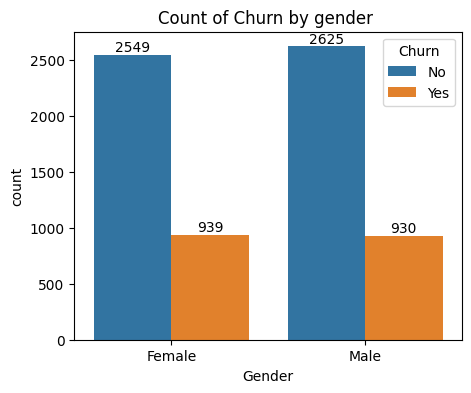

In [60]:
plt.figure(figsize=(5,4))
ax= sns.countplot(data = df, x ='Gender',hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Churn by gender ')
plt.show()

#From above graph we can conclude thaat there is not much difference on the basis of gender for chirned coustomer

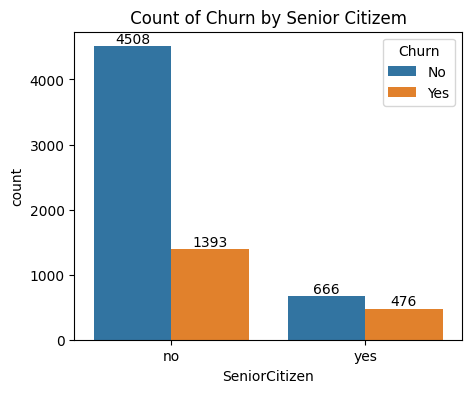

In [61]:
plt.figure(figsize=(5,4))
ax= sns.countplot(data = df, x ='SeniorCitizen',hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title(' Count of Churn by Senior Citizem ')
plt.show()

<Figure size 400x300 with 0 Axes>

<Figure size 600x400 with 0 Axes>

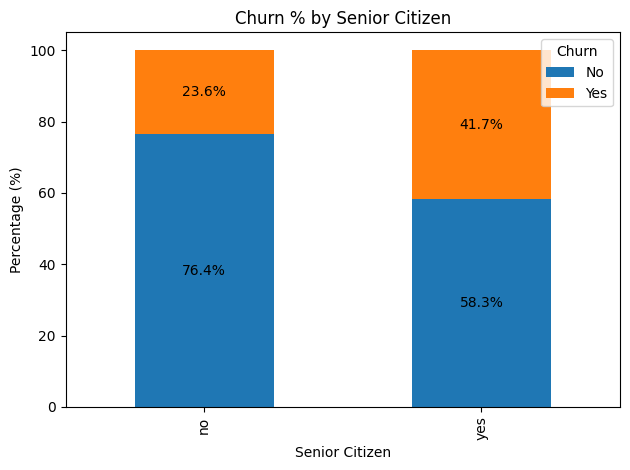

In [59]:
plt.figure(figsize=(4,3))

ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# 2. Convert counts to percentages
pct = ct.div(ct.sum(axis=1), axis=0) * 100

# 3. Plot stacked bar chart
plt.figure(figsize=(6,4))
ax = pct.plot(kind='bar', stacked=True)

plt.title("Churn % by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")

plt.legend(title="Churn", loc="upper right")

# 4. Add percentage labels inside the bars
for container in ax.containers:
    labels = [f"{v:.1f}%" if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

#On comparing greater percent of coustomer in senior citizen category have churned 

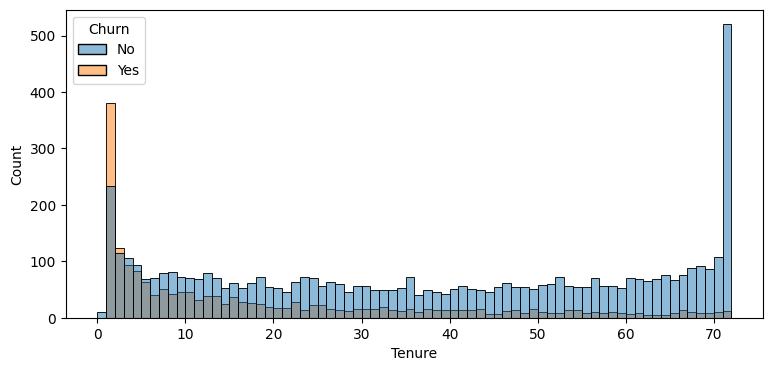

In [66]:
plt.figure(figsize=(9,4))
sns.histplot(x='Tenure', data = df,bins=72,hue ='Churn')
plt.show()

# People who have used our services for long time has stayed but the people who have used our service for 1-2 months have churned  

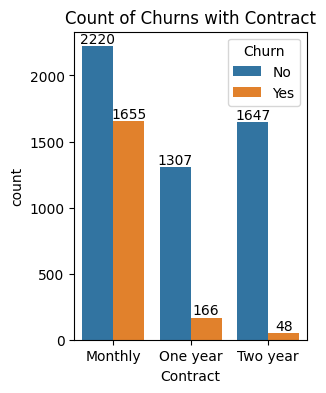

In [74]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='Contract',data = df,hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Churns with Contract')
plt.show()

#people who have month to month contract are likely to churn then the people having contract of 1 or 2 year.

In [76]:
df.columns.values

array(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

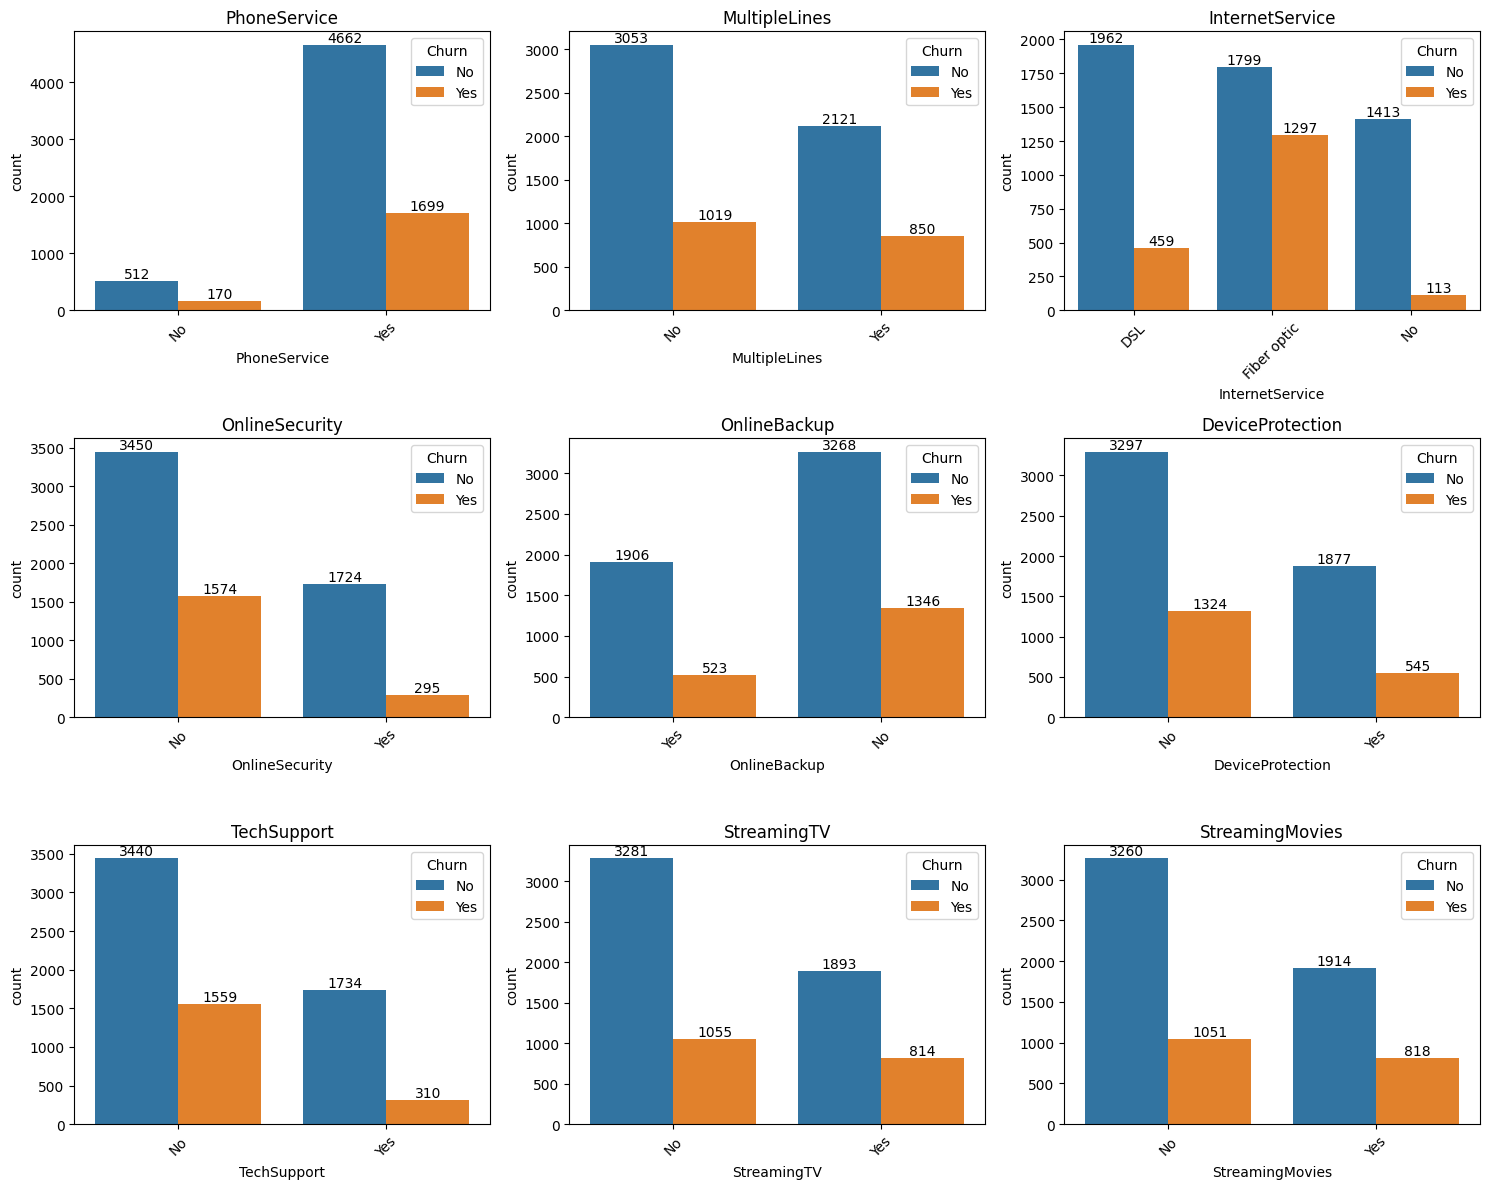

In [81]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(15, 12))        # large figure for readability

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)            # 3 rows × 3 columns
    ax = sns.countplot(data=df, x=col,hue ='Churn')
    plt.title(col)
    plt.xticks(rotation=45)
    
    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

#Customers who lack optional services (like OnlineSecurity, TechSupport, DeviceProtection, OnlineBackup) show significantly higher churn rates, indicating these features help retain users.
Fiber-optic internet users churn more compared to DSL or no-internet customers.
Across almost all service categories, the “Yes” group has a noticeably higher churn percentage, suggesting that customers paying for more add-ons may feel dissatisfied or overcharged.
Overall, churn is strongly linked to service usage patterns, especially internet type and security/backup-related services.

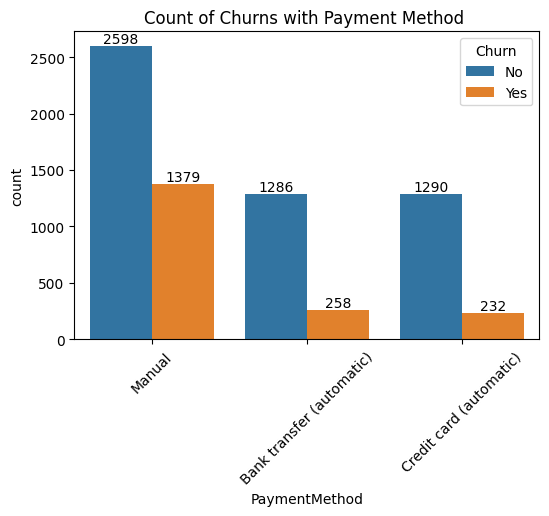

In [86]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod',data = df,hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Churns with Payment Method ')
plt.xticks(rotation = 45)

plt.show()


#Customers paying manually have the highest churn, while those using automatic bank transfer or credit card show significantly lower churn rates.